# Programming for Data Science and Artificial Intelligence

## 0 Statistics with Python

### Readings: 
- Statistics (scipy.stats) https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

### Random variables and probability distribution

A **random variable** is a variable whose possible values are numerical outcomes of a random phenomenon. There are two types of random variables, discrete and continuous.

A **discrete random variable** is one which may take on only a countable number of distinct values and thus can be quantified. For example, you can define a random variable $X$ to be the number which comes up when you roll a fair dice. $X$ can take values : <code>[1,2,3,4,5,6]</code> and therefore is a discrete random variable.

The **probability distribution** of a **discrete random variable** is a list of probabilities associated with each of its possible values. It is also sometimes called the probability function or the probability mass function. To have a mathematical sense, suppose a random variable $X$ may take $k$ different values, with the probability that $X=xi$ defined to be $P(X=x_i)=p_i$. Then the probabilities pi must satisfy the following:

1. $0 < p_i < 1$ for each $i$

2. $p_1 + p_2 + ... + p_k = 1$


For example, $p_1$ may refer to probability of rolling dice of 1 which could be some percentage like 13%.  $k$ here then is 6 because dice have 6 sides.

Some examples of discrete probability distributions are **Bernoulli distribution**, **Binomial distribution**, **Poisson distribution** etc.

A **continuous random variable** is one which takes an infinite number of possible values. For example, you can define a random variable $X$  to be the height of students in a class. Since the continuous random variable is defined over an interval of values, it is represented by the area under a curve (or the integral).

The **probability distribution** of a **continuous random variable**, known as probability distribution functions, are the functions that take on continuous values. The probability of observing any single value is equal to 0  since the number of values which may be assumed by the random variable is infinite. For example, a random variable X
may take all values over an interval of real numbers. Then the probability that $X$ is in the set of outcomes $A$.  The probability $P(A)$ is then defined to be the area above A and under a curve. The curve, which represents a function $p(x)$, must satisfy the following:

1. The curve has no negative values ($p(x)>0$ for all $x$)

2. The total area under the curve is equal to 1

A curve meeting these requirements is often known as a **density curve**. Some examples of continuous probability distributions are **normal distribution**, **exponential distribution**, **beta distribution**, etc.

There’s another type of distribution that often pops up in literature which you should know about called **cumulative distribution function** All random variables (discrete and continuous) have a cumulative distribution function. It is a function giving the probability that the random variable X is less than or equal to x, for every value x. For a discrete random variable, the cumulative distribution function is found by summing up the probabilities.

#### A bit how distributions are related to Data Science

You probably are wondering why and how distributions are related to Data Science.  Rolling dice seems a bit far fetch to data science.

We can easily see the relations like this by first understanding these simple facts:

1. Many things in the world have a distribution.  

     - For example, human heights, if we tried to collect data from the whole population of the world (which is impossible), is assumed to follow a normal distribution.  That is, statisticians believe that heights are crowded around average.  Of course, this assumption is even more pronounced if we focus on only one country

     - All image has a distribution.  Cat photos all share similar distributions.  Dog photos also share similar distributions.  It may be hard to imagine what are the numbers here, but imagine pixel brightness/colors here which we can create a distribution.  By understanding these distributions, we can sometimes generate a fake photo of Cat!  and Dog!  or even use these distributions to predict whether it's a cat or dog

     - Shopping behaviors has a distribution.  Assume the numbers here are number of dollars used.  If we understand this distribution, we can perform something cool like customer segmentation

     - Each music in the world has a distribution.  Drums has its own distribution of bass, beats, etc (I don't really know much about music either!).  Guitar also has its own distribution.  If we know these distributions, we can filter out noise by filter only data with these distributions.  Isn't it amazing?

     - Customer queuing can be modeled with distribution.  Let's say queuing follows an exponential distribution.  This means that queuing starts off as an ok thing and get worse after some point.  Understanding this distribution allows us to arange the queue in a more efficient way.

     - Perhaps car crashes can be modeled with a Poisson distribution which describes number of crashes within a time interval.  Using this, we may able to predict number of crashes in the future.

2. Understanding distribution shape can be done by machine
    
    - One difficult thing about distribution is that it is not easy to understand the distribution of data.  Consider an image with (1920 x 1080) pixels....., it is really difficult!  However, providing a machine, we can ask the machine look at particular batch of pixels and try to understand the distribution.  Do you start to see why machine and distribution are related to Data Science
    
    - Of course, that's not the end of pipeline.  Once the machine gets a rough idea what is the distribution, it can further use it to predict, and then revise its model. That's exactly how distribution and data science are related.  Of course, not all machine learning uses distributions directly, but one can strongly say that almost all models at least have some assumptions of distributions when the creators create the models.   
    
Ok, enough talking.  Let's jump to Python right away to see some examples.

In [1]:
# import matplotlib
import matplotlib.pyplot as plt

#### 1. Uniform Distribution

Perhaps one of the simplest and useful distribution is the uniform distribution. The probability distribution function of the continuous uniform distribution is:

$$
    f(x) =
    \begin{cases}
      \frac{1}{b-a}, & \text{if}\ a\leq x \leq b \\
      0, & \text{if} x < a \text{  or  } x > b
    \end{cases}
$$

Since any interval of numbers of equal width has an equal probability of being observed, the curve describing the distribution is a rectangle, with constant height across the interval and 0 height elsewhere. Since the area under the curve must be equal to 1, the length of the interval determines the height of the curve. 

The following figure shows a uniform distribution in interval (a,b). Notice since the area needs to be 1. The height is set to $1/(b−a)$

In [2]:
# import uniform distribution
from scipy.stats import uniform

n = 10000
a = 10
width = 20 # b = 30

#rvs stands for random variates, which simply generate random numbers
#based on the distribution
data_uniform = uniform.rvs(size=n, loc=a, scale=width)

print(data_uniform)

[25.50291768 16.86058519 19.19253666 ... 23.69300423 15.29816517
 12.92057599]


(1.0, 50.0)

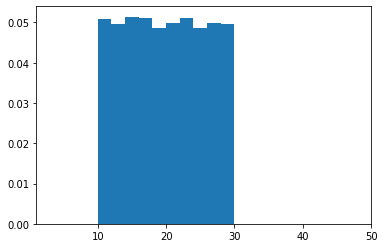

In [3]:
#plot the data
plt.hist(data_uniform, density=True)  ##density=True makes sum=1
plt.xlim(1, 50)

#notice 1/(b-a) = 0.05

#### 2. Normal Distribution

Normal Distribution, also known as **Gaussian distribution**, is ubiquitous in Data Science. You will encounter it at many places especially in topics of statistical inference. It is one of the assumptions of many data science algorithms too.

A normal distribution has a bell-shaped density curve described by its mean $\mu$
 and standard deviation $\sigma$
. The density curve is symmetrical, centered about its mean, with its spread determined by its standard deviation showing that data near the mean are more frequent in occurrence than data far from the mean. The probability distribution function of a normal density curve with mean $\mu$ and standard deviation $\sigma$ at a given point x is given by:

$$
f(x \mid \mu, \sigma)= \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

You can generate a normally distributed random variable using <code>scipy.stats</code> module's <code>norm.rvs()</code> method. The loc argument corresponds to the mean of the distribution. scale corresponds to standard deviation and size to the number of random variates. If you want to maintain reproducibility, include a random_state argument assigned to a number.

(array([0.00063987, 0.00780636, 0.04709412, 0.17314768, 0.34347995,
        0.38302366, 0.22651249, 0.07998322, 0.01676448, 0.00127973]),
 array([-4.03875685, -3.25734297, -2.47592909, -1.69451522, -0.91310134,
        -0.13168746,  0.64972642,  1.4311403 ,  2.21255418,  2.99396806,
         3.77538193]),
 <a list of 10 Patch objects>)

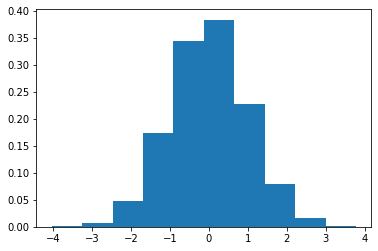

In [4]:
from scipy.stats import norm

# generate random numbers from mean = 0, std = 1
data_normal = norm.rvs(size=10000,loc=0,scale=1)

#plot the data
plt.hist(data_normal, density=True)  ##density=True makes sum=1

Almost 68% of the data falls within a distance of one standard deviation from the mean on either side and 95% within two standard deviations. Also it worth mentioning that a distribution with mean 0 and standard deviation 1 is called a standard normal distribution.

#### 3. Gamma Distribution

The gamma distribution is a two-parameter family of continuous probability distributions. While it is used rarely in its raw form but other popularly used distributions like exponential, chi-squared, erlang distributions are special cases of the gamma distribution. The gamma distribution can be parameterized in terms of a positive shape parameter $\alpha$, and a positive inverse scale parameter $\beta$ which is equal to $1/\theta$:

$$ f(x \mid \alpha, \beta) = \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)} $$

The $\Gamma$ function has the simple formula as

$$ \Gamma(n) = (n - 1)!$$

You can generate a gamma distributed random variable using <code>scipy.stats</code> module's <code>gamma.rvs()</code> method which takes shape parameter $\alpha$ as its argument. When $\alpha$ is an integer, gamma reduces to the Erlang distribution, and when $\alpha = 1$ to the exponential distribution. To shift distribution use the <code>loc</code> argument, to scale use <code>scale</code> argument, size decides the number of random variates in the distribution. If you want to maintain reproducibility, include a <code>random_state</code> argument assigned to a number.


(array([0.28732696, 0.33127108, 0.24563638, 0.11493078, 0.08225438,
        0.03154963, 0.02140868, 0.00676063, 0.00338032, 0.00225354]),
 array([10.06572108, 10.95321177, 11.84070245, 12.72819314, 13.61568383,
        14.50317452, 15.39066521, 16.2781559 , 17.16564658, 18.05313727,
        18.94062796]),
 <a list of 10 Patch objects>)

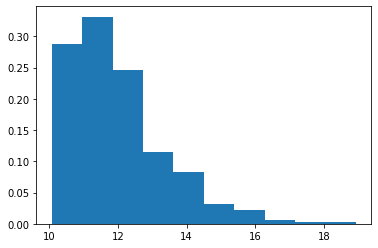

In [5]:
from scipy.stats import gamma
data_gamma = gamma.rvs(a=2, size=1000, loc=10, scale=1)  #loc simply shift

#plot the data
plt.hist(data_gamma, density=True)  ##density=True makes sum=1

#### 4. Exponential Distribution

The exponential distribution describes the time between events in a Poisson point process, i.e., a process in which events occur continuously and independently at a constant average rate. It has a parameter $\lambda$ called rate parameter, and its equation is described as :

$$
    f(x \mid \lambda) =
    \begin{cases}
      \lambda e^{-\lambda x} & x\geq 0, \\
      0 & \text{otherwise}
    \end{cases}
$$

You can generate an exponentially distributed random variable using <code>scipy.stats</code> module's <code>expon.rvs()</code> method which takes shape parameter scale as its argument which is nothing but $1/\lambda$ in the equation. To shift distribution use the <code>loc</code> argument, <code>size</code> decides the number of random variates in the distribution. If you want to maintain reproducibility, include a <code>random_state</code> argument assigned to a number.



(array([0.0680773 , 0.03167233, 0.01322714, 0.00448995, 0.0016989 ,
        0.00109215, 0.0007281 , 0.        , 0.00012135, 0.0002427 ]),
 array([2.45117578e-02, 8.26514371e+00, 1.65057757e+01, 2.47464076e+01,
        3.29870396e+01, 4.12276715e+01, 4.94683035e+01, 5.77089354e+01,
        6.59495674e+01, 7.41901993e+01, 8.24308313e+01]),
 <a list of 10 Patch objects>)

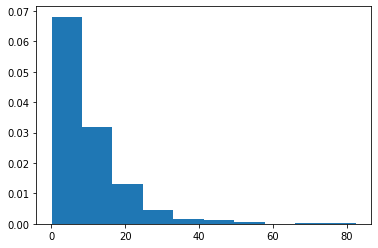

In [6]:
from scipy.stats import expon
data_expon = expon.rvs(scale=10,loc=0,size=1000)

#plot the data
plt.hist(data_expon, density=True)  ##density=True makes sum=1

#### 5. Poisson Distribution

Poisson random variable is typically used to model the number of times an event happened in a time interval. For example, the number of users visited on a website in an interval can be thought of a Poisson process. Poisson distribution is described in terms of the rate ($\mu$) at which the events happen. An event can occur 0, 1, 2, … times in an interval. The average number of events in an interval is designated $\lambda$(lambda). Lambda is the event rate, also called the rate parameter. The probability of observing $k$
events in an interval is given by the equation

$$ P(k) = e^{-\lambda}\frac{\lambda^k}{k!}$$

Note that the normal distribution is a limiting case of Poisson distribution with the parameter $\lambda \rightarrow \infty$. Also, if the times between random events follow an exponential distribution with rate $\lambda$, then the total number of events in a time period of length $t$ follows the Poisson distribution with parameter $\lambda t$.

You can generate a poisson distributed discrete random variable using <code>scipy.stats</code> module's <code>poisson.rvs()</code> method which takes $\mu$ as a shape parameter and is nothing but the $\lambda$ in the equation.

(array([4.04166667e-03, 2.30833333e-02, 1.11208333e-01, 1.04208333e-01,
        8.50416667e-02, 6.60000000e-02, 1.65833333e-02, 6.12500000e-03,
        2.91666667e-04, 8.33333333e-05]),
 array([ 1. ,  3.4,  5.8,  8.2, 10.6, 13. , 15.4, 17.8, 20.2, 22.6, 25. ]),
 <a list of 10 Patch objects>)

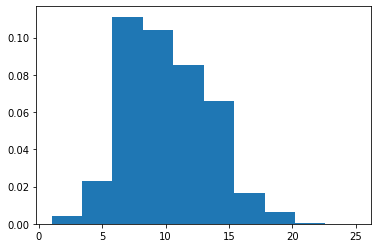

In [7]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=10, size=10000)

#plot the data
plt.hist(data_poisson, density=True)  ##density=True makes sum=1

#### 6. Binomial Distribution

A distribution where only two outcomes are possible, such as success or failure, gain or loss, win or lose and where the probability of success and failure is same for all the trials is called a Binomial Distribution. However, the outcomes need not be equally likely, and each trial is independent of each other. The parameters of a binomial distribution are $n$ and $p$ where $n$ is the total number of trials, and $p$ is the probability of success in each trial. The probability distribution function of getting exactly $k$ successes in $n$ independent trials is given by:

$$
 Pr(k; n, p) = Pr(X = k) =  \binom{n}{k} \cdot p^k(1-p)^{n-k}
$$

where:

$$
\binom{n}{k} = \frac{n!}{k!(n-k)!}
$$



You can generate a binomial distributed discrete random variable using <code>scipy.stats</code> module's <code>binom.rvs()</code> method which takes $n$ (number of trials) and $p$ (probability of success) as shape parameters. To shift distribution use the <code>loc</code> parameter. <code>size</code> decides the number of times to repeat the trials. If you want to maintain reproducibility, include a <code>random_state</code> argument assigned to a number.

(array([0.00105, 0.01032, 0.04425, 0.11585, 0.20512, 0.24625, 0.20697,
        0.11595, 0.04348, 0.01076]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

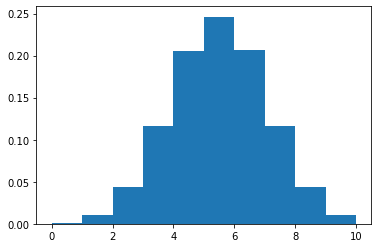

In [8]:
from scipy.stats import binom
data_binom = binom.rvs(n=10,p=0.5,size=100000)

#plot the data
plt.hist(data_binom, density=True)  ##density=True makes sum=1

Interestingly, normal distribution is a special case of binomial distribution under the following conditions:

1. Number of trials approaching infinity $n \rightarrow \infty$

2. Both p and q are not indefinitely small, i.e., p around 0.5

Also note that if $n=1$, then it becomes a **Bernoulli distribution**, which you can calculate using <code>scipy.stats.bernoulli</code>

### Exploratory Analysis and Inferential Statistics

Here we gonna load some testset and learn about some useful statistics we can apply.  We focus particularly on inferential statistics since it is a useful technique to compare difference of means whether they are statistically different or just a fluke.

To import the iris, we gonna use sklearn.datasets API which allow us to easily import the file:

In [9]:
from sklearn.datasets import load_iris
import pandas as pd
from scipy import stats

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Let's look at summary using <code>df.describe()</code>

In [10]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
grouped_iris = df.groupby('target')
grouped_iris.mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


target
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: petal width (cm), dtype: object

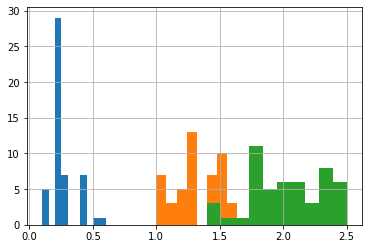

In [12]:
grouped_iris['petal width (cm)'].hist()

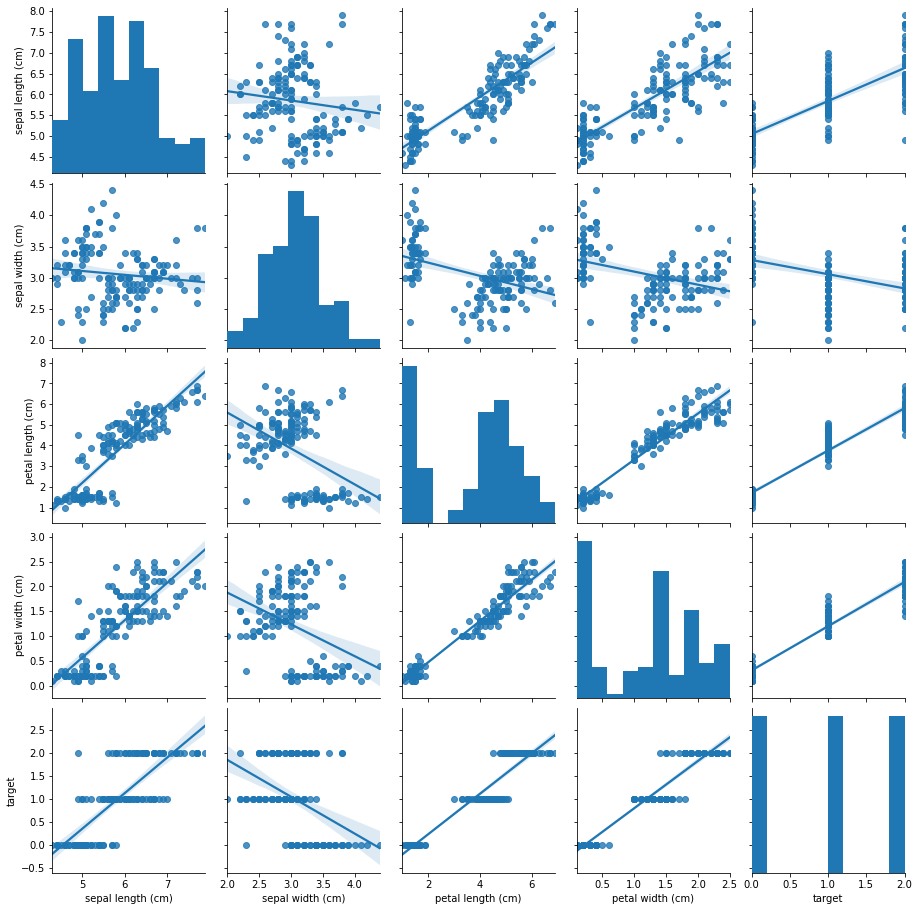

In [13]:
import seaborn as sns

sns.pairplot(df, kind='reg')

#### Comparing Distribution

In [14]:
sl_setosa = df[df['target'] == 0]['sepal length (cm)']
sl_virginica = df[df['target'] == 1]['sepal length (cm)']
sl_versicolor = df[df['target'] == 2]['sepal length (cm)']

type(sl_setosa)

pandas.core.series.Series

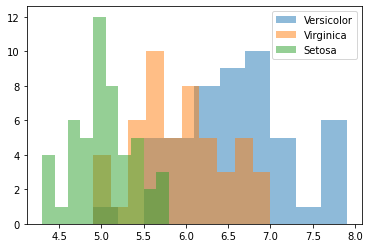

In [15]:
plt.hist(sl_versicolor, label='Versicolor', alpha=0.5)
plt.hist(sl_virginica, label='Virginica', alpha=0.5)
plt.hist(sl_setosa, label='Setosa', alpha=0.5)
plt.legend(loc='best')

#### Normality testing

We can also perform statistical test testing on the normality of each distribution.  Namely, there are two tests:

- Kolmogorov-Smirnov
- Shapiro

In [16]:
ks_sl_setosa = stats.kstest(sl_setosa, 'norm', mode='asymp') # mode opts: 'approx'. Dist can be any in scipy.stats
ks_sl_setosa

#if p value is < 0.05, we don't believe that our variable 
#follows a normal distribution in our population

#here, our p-value is very small, thus ks suggest is not normal

KstestResult(statistic=0.999991460094529, pvalue=7.45287039494443e-44)

In [17]:
shapiro_sl_setosa = stats.shapiro(sl_setosa)
shapiro_sl_setosa  #statistics, p-value

#here p-value is bigger than 0.05,  thus shapiro suggests it's normal!

(0.9776989221572876, 0.4595281183719635)

How come two tests given different results!!

This is because they used different algorithms.  Kolmogorov is a general method that compares the expected cdf with the given cdf while Shapiro is specifically for normal testing focusing on measuring goodness-of-fit against expected means, variances, and covariances.   So which one to use?

For large samples (and even for some smaller ones, in my experience), the Shapiro-Wilk test is way too sensitive, and will reject the null hypothesis (of normality) with even tiny deviations. It has the highest power of any of the common normality tests, so if you need to be really, really sure that a small-to-medium dataset is normal, Shapiro-Wilk is a pretty good test to start with. If your dataset is large, or you want to use one test statistic to compare against multiple theoretical distributions, K-S is going to be what you want.

#### Homogeneity of Variance

Some tests such as ANOVA assume homogeneity of variance.  Basically, when you compare two groups, most parametric tests assume that these two groups have similar variance.  

It makes sense right?  If we are comparing weight of chicken and duck.  While chicken weight is mostly crowded around mean, duck is skewed to the right.  In these cases, we can really compare them using mean and standard deviation.  We need to use something called non-parametric method which we shall talk later

In [18]:
bartlett_sl_versicolor = stats.bartlett(sl_versicolor, sl_virginica)
print(bartlett_sl_versicolor)

#if p value > 0.05, we say that the variance is equal
#barlett test is sensitive to non-normal distributions, thus
#levene is better alternative for non-normal distributions

BartlettResult(statistic=2.094933311010139, pvalue=0.14778816016231236)


In [19]:
levene_sl_versicolor = stats.levene(sl_versicolor, sl_virginica)
print(levene_sl_versicolor)

#if p value > 0.05, we say that the variance is equal

LeveneResult(statistic=1.024522457408365, pvalue=0.3139412235249392)


#### Comparing two means: T-Tests

T-tests is a parametric tests, comparing two groups, whether they are different, with many assumptions with the major one as: normality of data distributions, and equality of variance

Wait, why do we need to compare that they are different?  Can we just look at the mean?  Answer is no because it may due to chance.

Assume these two groups of price:

Group 1: 4, 4, 5, 5, 6, 6  (mean = 5)
Group 2: 1, 1, 1, 1, 1, 100 (mean = 16.5)

As you can see, if we look at only the mean, we may be misled that Group 2 is better.  In fact, this is not true!  This is due to the outlier of 100.  

Statistical test can help.  By analyzing the standard deviation (or variance), we can know whether the data looks like this.  That's why we have to perform statistical tests when we compare two groups.  Could be comparing DrugA vs. DrugB, Camera1 vs. Camera2, etc.  All require statistical test.

Assuming our data is normally distributes, and meet the equality of variance assumption, we can compare groups like this:

In [20]:
# t-test of 2 independent samples
ind_ttest = stats.ttest_ind(sl_setosa, sl_versicolor, equal_var=True, nan_policy='omit') # equal_var default: T
print(ind_ttest)

#if p-value < 0.05, we say that they are statisticially different

Ttest_indResult(statistic=-15.386195820079404, pvalue=6.892546060674059e-28)


In [21]:
# t-test of paired samples
paired_ttest = stats.ttest_rel(sl_setosa, sl_versicolor, nan_policy='omit')
print(paired_ttest)

#if p-value < 0.05, we say that they are statisticially different

Ttest_relResult(statistic=-16.344145683358008, pvalue=1.789394192251355e-21)


#### So paired or independent?

If your groups are related, it's paired. Otherwise, independent.

For example, if I test some DrugA with participants, with pretest and posttest.  Comparing pretest and posttest will be **paired**

If I test Drug A on 30 participants and Drug B on another 30 participants, it will be **independent**

#### Effect sizes

While p-value informs us whether groups are statistically different, it does not inform us the "how much" they are different.

One way we can gauge that is using a measure called effect sizes method.  There are many, one of which is Cohen's d which can be calculated as

$$ d = \frac{\bar{x_1} - \bar{x_2}}{SD_{p}}$$

where $SD_{p}$ is

$$ \sqrt{\frac{(N_1 - 1)(SD_1^2) + (N_2 - 1)(SD_2^2)}{N_1 + N_2 - 2}} $$

d=0.2 small effect size, 0.5 medium, 0.8 large

This can be easily calculated in python as follows:

In [22]:
import numpy as np

x1_mean = sl_setosa.mean()
x2_mean = sl_versicolor.mean()
n1 = sl_setosa.size
n2 = sl_versicolor.size
sd1 = sl_setosa.std()
sd2 = sl_versicolor.std()

sdp = np.sqrt(((n1 - 1)*(sd1**2) + (n2 - 1)*(sd2**2))/(n1 + n2 - 2))

d = (x1_mean - x2_mean)/sdp

print(d) 

-3.0772391640158805


Given 3.07 (ignoring the sign because it depends which x1 - x2 or x2 - x1, thus sign is ignored), we can say that the difference is really huge!

#### Comparing two means: Non-parametric tests

What if your data is not normal or does not have equality of variances.  Well we have to use weaker models to check the statistical differences.  These models are called non-parametric tests.  For comparing two means, they are:

- Wilcoxon rank-sum
- Mann-Whitney U
- Wilcoxon

In [23]:
# Wilcoxon rank-sum test: Can use if n < 20
ranksum = stats.ranksums(sl_setosa, sl_versicolor)
print(ranksum)

#if p-value < 0.05, we say that they are statisticially different

RanksumsResult(statistic=-8.351862779116292, pvalue=6.71947003242093e-17)


In [24]:
# Mann-Whitney U test: More robust than Wilcoxon rank-sum, use if n > 20
whitney = stats.mannwhitneyu(sl_setosa, sl_versicolor)
print(whitney)

#if p-value < 0.05, we say that they are statisticially different

MannwhitneyuResult(statistic=38.5, pvalue=3.198349534698269e-17)


In [25]:
# Wilcoxon test: For paired samples
wilcoxon = stats.wilcoxon(sl_setosa, sl_versicolor)
print(wilcoxon)

#if p-value < 0.05, we say that they are statisticially different

WilcoxonResult(statistic=0.0, pvalue=1.0947696934612459e-09)


#### Comparing Multiple Groups

Parametric: ANOVA
non-Parametric: Kruskal-Wallis H

In [26]:
# 1-way ANOVA: Parametric
anova = stats.f_oneway(sl_setosa, sl_versicolor, sl_virginica)
print(anova)

#if p-value < 0.05, we say that they are statisticially different

F_onewayResult(statistic=119.26450218450468, pvalue=1.6696691907693826e-31)


In [27]:
kruskal = stats.kruskal(sl_setosa, sl_versicolor, sl_virginica)
print(kruskal)

#if p-value < 0.05, we say that they are statisticially different

KruskalResult(statistic=96.93743600064833, pvalue=8.91873433246198e-22)


These tests help us understand these groups are statistically different.  But they do not tell us which pair of group is different.  We can drill down and perform a paired test called **posthoc** test.

There are many nice posthoc test.  Here we will be using the common posthoc test which is the Tukey-Kramer HSD.  Unforunately, scipy.stats somehow decide not to implement posthoc test.  We can use another power library called **statsmodels** to perform this step

In [28]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
                                         
tukey = pairwise_tukeyhsd(df['sepal length (cm)'], df['target'])
print(tukey)  #look at p-adj which stands for adjusted p-value

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1     0.93 0.001 0.6862 1.1738   True
     0      2    1.582 0.001 1.3382 1.8258   True
     1      2    0.652 0.001 0.4082 0.8958   True
-------------------------------------------------


#### Correlation

Of course, python can also be used to perform correlation.  There are many techniques.  Two common ones include:
- Parametric: Pearson's correlation coefficient r
- Non-parametric: Spearman rank-order correlation coefficient rho

In [29]:
# Pearson correlation coefficient: Parametric
pearson = stats.pearsonr(df['sepal length (cm)'],df['petal length (cm)'])
print(pearson)

(0.8717537758865831, 1.0386674194498099e-47)


In [30]:
# Spearman rank-order correlation coefficient: Non-parametric
spearman = stats.spearmanr(df['sepal length (cm)'],df['petal length (cm)'])
print(spearman)

SpearmanrResult(correlation=0.881898126434986, pvalue=3.4430872780470036e-50)


### What's Next?
- I think it become more interesting when you later can see how these distributions can be used in machine learning and computer science.  Especially, you will learn the ins-and-outs of each algorithm, which will allow you to understand how distributions play a role in predicting
- On January semester, I will be teaching HCI (Human Computer Interaction).  In this course, we will heavily study how to perform common experimental research in computer science by objectively compare our proposed solution against baseline solution using inferential statistics.  You will be so amazed how all these top stuffs especially inferential statistics can be applied.  It will be fun (I hope for you)!